### Twitter Sentiment Analysis and Prediction

This notebook does not forcus on optimize the predict model to get the best performance result. Instead, the model use only text column to concentrate on feature engineer in NLP and Sentiment Analysis 

**Index:**

   **1. TF-IDF and fit the model:** Go through the brief process and fit model with Logistic Regression
   
   **2. Adding Punctuation Remove, Stopword Remove, Lemmatization and refit the model:** apply most common and basic feature engineer for NLP and refit with Logistic Regression to compare the results. 
   
   **3. Predict with RandomForest and Xgboost model:** try other model to see whether performance can be improved
   
   **4. Sentiment Analysis with WordCloud:** Visualize the top extreme word that affect the sentiment result, wordcloud base on ranking not the frequency.
    

In [617]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords
lemmatizer = WordNetLemmatizer()

In [618]:
df = pd.read_csv('Tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [620]:
df['text'].head() #checking how text look like

0                  @VirginAmerica What @dhepburn said.
1    @VirginAmerica plus you've added commercials t...
2    @VirginAmerica I didn't today... Must mean I n...
3    @VirginAmerica it's really aggressive to blast...
4    @VirginAmerica and it's a really big bad thing...
Name: text, dtype: object

In [621]:
df['text'][3]

'@VirginAmerica it\'s really aggressive to blast obnoxious "entertainment" in your guests\' faces &amp; they have little recourse'

In [622]:
df = df[['text', 'airline_sentiment']]
df.head()

,text,airline_sentiment
0,@VirginAmerica What @dhepburn said.,neutral
1,@VirginAmerica plus you've added commercials t...,positive
2,@VirginAmerica I didn't today... Must mean I n...,neutral
3,@VirginAmerica it's really aggressive to blast...,negative
4,@VirginAmerica and it's a really big bad thing...,negative


C:\Users\e175932\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='airline_sentiment', ylabel='count'>

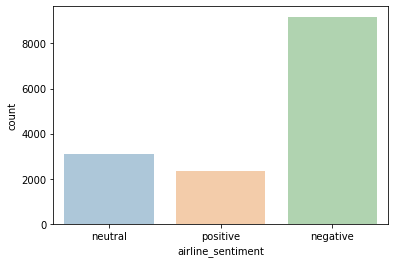

In [623]:
sns.countplot(df['airline_sentiment'], alpha = 0.4)

In [624]:
df['target'] = df['airline_sentiment'].apply(lambda x: 2 if x == 'positive' else 1 if x == 'neutral'else 0)
df.head()

,text,airline_sentiment,target
0,@VirginAmerica What @dhepburn said.,neutral,1
1,@VirginAmerica plus you've added commercials t...,positive,2
2,@VirginAmerica I didn't today... Must mean I n...,neutral,1
3,@VirginAmerica it's really aggressive to blast...,negative,0
4,@VirginAmerica and it's a really big bad thing...,negative,0


In [625]:
X = df['text']
y = df['target']
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df)

In [626]:
df_train.head()

,text,airline_sentiment,target
5675,@SouthwestAir can you answer the phone so I ca...,negative,0
1581,@united flight to DFW from IAD Cancelled Fligh...,neutral,1
4245,@united Q: Just purchased ticket to #Hawaii fo...,neutral,1
9945,@USAirways it's unacceptable the way your agen...,negative,0
1316,"@united I guess you have to ""follow"" me in ord...",negative,0


### 1. TF-IDF and Fit the model

In [627]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize1 = TfidfVectorizer()
X_train = vectorize1.fit_transform(df_train['text'])
X_train.shape

(10980, 12761)

In [628]:
X_test = vectorize1.transform(df_test['text'])
y_train = df_train['target']
y_test = df_test['target']

**Logistic Regression**

In [629]:
glm = LogisticRegression(max_iter=500)
glm.fit(X_train, y_train)
pred1 = glm.predict_proba(X_test)


In [630]:
p_pred1 = glm.predict(X_test)
cm1 = metrics.confusion_matrix(y_test, p_pred1, normalize='true')

In [631]:
print("AUC: ", metrics.roc_auc_score(y_test, pred1, multi_class='ovo'))

AUC:  0.8930764847105923


In [632]:
print(metrics.classification_report(y_test, p_pred1))

              precision    recall  f1-score   support

           0       0.82      0.94      0.88      2303
           1       0.69      0.51      0.59       776
           2       0.82      0.64      0.72       581

    accuracy                           0.80      3660
   macro avg       0.78      0.70      0.73      3660
weighted avg       0.79      0.80      0.79      3660



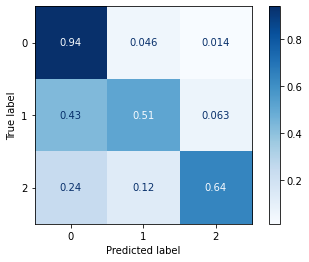

In [633]:
metrics.plot_confusion_matrix(glm, X_test, y_test, normalize= 'true', cmap='Blues' )  

### 2. Fitting Model with Punctuation Remove, Stopword Remove, Lemmatization

In [634]:
import nltk
from nltk.stem import WordNetLemmatizer

In [635]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\e175932\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\e175932\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [636]:
def text_analyze(mess):
#     1. Remove all punctuation
        punc_remove = [char for char in mess if char not in string.punctuation ]
        nopunc = "".join(punc_remove)
        
#     2. Remove all stopwords
        sw_remove = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
        
        #3. lemmatize
        return  " ".join([lemmatizer.lemmatize(w) for w in sw_remove])
        

In [637]:
# #test text_analyzie to see if it works
string1 = "say something i'm giving up on you, sorry, that I couldn't get to you"
text_analyze(string1)

'say something im giving sorry couldnt get'

In [638]:
d_train = df_train['text'].apply(text_analyze)
d_test =  df_test['text'].apply(text_analyze)

In [639]:
vectorize =  TfidfVectorizer()
X_train = vectorize.fit_transform(d_train)
X_test = vectorize.transform(d_test)

In [640]:
glm2 = LogisticRegression(max_iter=500)
glm2.fit(X_train, y_train)
pred1 = glm2.predict_proba(X_test)

In [641]:
pred2 = glm2.predict(X_test)
p_pred2 = glm2.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred2, multi_class='ovo'))
print(metrics.classification_report(y_test, pred2))

AUC:  0.8844573269599385
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2303
           1       0.69      0.48      0.57       776
           2       0.81      0.63      0.71       581

    accuracy                           0.79      3660
   macro avg       0.77      0.68      0.72      3660
weighted avg       0.79      0.79      0.78      3660



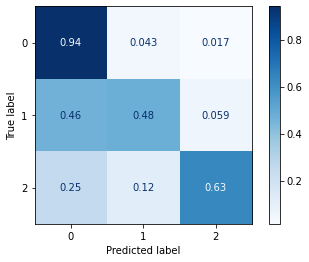

In [642]:
metrics.plot_confusion_matrix(glm2, X_test, y_test, normalize= 'true', cmap='Blues' )  

***The performance of the model did not improve after applying Punctuation Remove, Stopword Remove, Lemmatization and TF-IDF. Thees methods do not help in this case.***

### 3. Fitting model with RandomForest and XGBOOST

**Random Forest**

In [643]:
vectorize = TfidfVectorizer()
X_train = vectorize.fit_transform(df_train['text'])
X_test = vectorize.transform(df_test['text'])
rf = RandomForestClassifier( )
rf.fit(X_train,y_train)
print(rf.score(X_test, y_test))

0.7562841530054645


In [644]:
pred3 = rf.predict(X_test)
p_pred3 = rf.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred3, multi_class='ovo'))
print(metrics.classification_report(y_test, pred3))

AUC:  0.8563321665006255
              precision    recall  f1-score   support

           0       0.76      0.96      0.85      2303
           1       0.71      0.37      0.49       776
           2       0.81      0.45      0.58       581

    accuracy                           0.76      3660
   macro avg       0.76      0.60      0.64      3660
weighted avg       0.76      0.76      0.73      3660



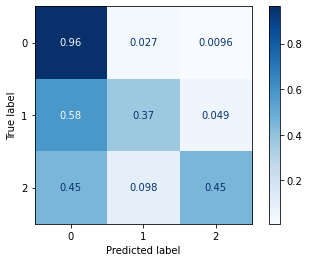

In [645]:
metrics.plot_confusion_matrix(rf, X_test, y_test, normalize= 'true', cmap='Blues' )  

**Xgboost**

In [646]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import mean_squared_error
  
clf = xgb.XGBClassifier(
    n_jobs = 1,
    objective = 'multi:prob',
    silent=1,
    tree_method='approx'
)   

In [647]:
clf.fit(X_train, y_train)

[16:37:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=1, num_parallel_tree=1, objective='multi:softprob',
              predictor='auto', random_state=0, reg_alpha=0, ...)

In [648]:
pred4 = clf.predict(X_test)
p_pred4 =clf.predict_proba(X_test)
print("AUC: ", metrics.roc_auc_score(y_test, p_pred4, multi_class='ovo'))
print(metrics.classification_report(y_test, pred4))

AUC:  0.8831691816182804
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2303
           1       0.65      0.53      0.58       776
           2       0.76      0.61      0.68       581

    accuracy                           0.78      3660
   macro avg       0.74      0.68      0.71      3660
weighted avg       0.78      0.78      0.78      3660



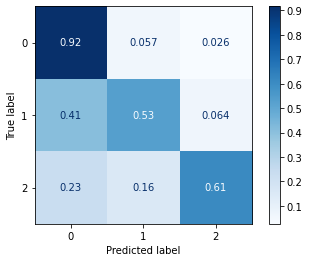

In [649]:
metrics.plot_confusion_matrix(clf, X_test, y_test, normalize= 'true', cmap='Blues' )  

## 4. Sentiment Analysis with WordCloud

**Play with predict**

In [650]:
decode_map = {0: "NEGATIVE", 1: "NEUTRAL", 2: "POSITIVE"}
def decode_sentiment(label):
    return decode_map[int(label)]

def predict_text(text):
    text = [text]
    # Tokenize text
    x_test = vectorize1.transform(text)
    # Predict
    score = glm.predict(x_test)
    # Decode sentiment
    label = decode_sentiment(score)
    return {"label": label}  

In [651]:
predict_text("I love the music")

{'label': 'POSITIVE'}

In [652]:
predict_text("I hate waiting")

{'label': 'NEGATIVE'}

In [653]:
predict_text("Just give me a reason. Just a little bit's enough")

{'label': 'NEGATIVE'}

In [654]:
predict_text("it is raining today")

{'label': 'NEGATIVE'}

**Word cloud**

In [655]:
from wordcloud import WordCloud
word_index_map = vectorize1.vocabulary_
d_weight = pd.DataFrame.from_dict(word_index_map, orient= 'index').reset_index()
d_weight.columns = ['word', 'index']
d_weight['weight'] =  d_weight['index'].apply(lambda x:glm.coef_[0][x] )
d_weight['weight'].describe()

count    12761.000000
mean         0.016443
std          0.272544
min         -4.588117
25%         -0.101319
50%          0.024239
75%          0.104516
max          3.780698
Name: weight, dtype: float64

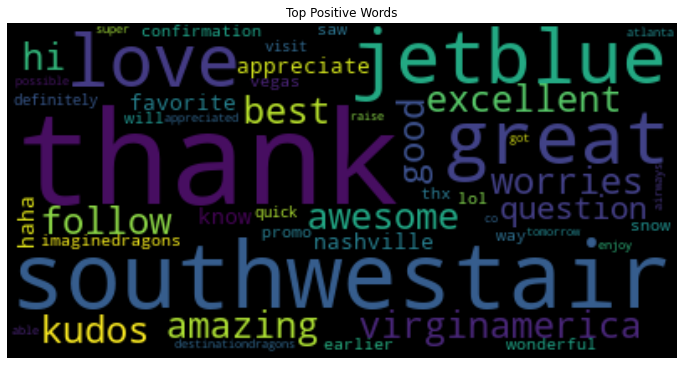

In [656]:
#top posiive word
pos_df = d_weight.sort_values(by = 'weight', ascending=True)
pos = pos_df['word'][:50]
wcloud_postive = WordCloud(relative_scaling=0).generate(' '.join(pos))
plt.figure(figsize=(12,12))
plt.imshow(wcloud_postive, interpolation='bilinear')
plt.title("Top Positive Words")
plt.axis("off")
plt.show()

In [657]:
pos_df[['word', 'weight']].head(10)

,word,weight
69,thanks,-4.588117
126,thank,-4.582131
0,southwestair,-2.858165
68,jetblue,-2.839949
197,great,-2.839810
879,love,-2.699965
318,virginamerica,-2.484201
3917,worries,-2.198321
429,awesome,-2.004010
667,amazing,-1.967396


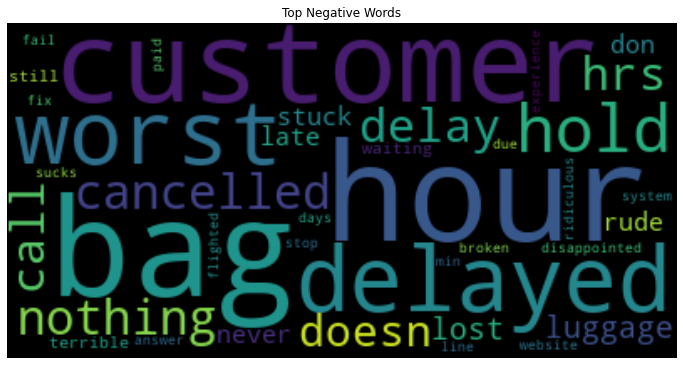

In [658]:
#top negative words
neg_df = d_weight.sort_values(by = 'weight', ascending=False)
neg = neg_df['word'][:50]
wcloud_negative = WordCloud(relative_scaling=0).generate(' '.join(neg))
plt.figure(figsize=(12,12))
plt.imshow(wcloud_negative, interpolation='bilinear')
plt.title("Top Negative Words")
plt.axis("off")
plt.show()

In [659]:
neg_df[['word', 'weight']].head(10)

,word,weight
80,not,3.780698
75,no,3.627552
99,delayed,3.309885
200,hours,3.165547
780,worst,3.085349
458,why,3.046084
181,hold,2.814236
17,cancelled,2.735151
704,nothing,2.314940
721,delay,2.230806


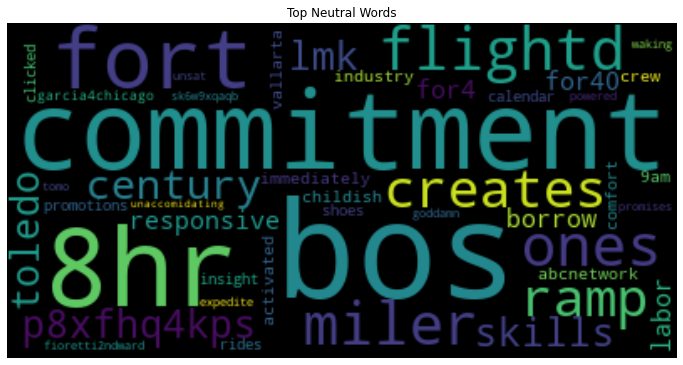

In [660]:
#top neutral words
neu_df = d_weight.sort_values(by = 'weight', ascending=True, key=abs)
neu = neu_df['word'][:50]
wcloud_neu = WordCloud(relative_scaling=0).generate(' '.join(neu))
plt.figure(figsize=(12,12))
plt.imshow(wcloud_neu, interpolation='bilinear')
plt.title("Top Neutral Words")
plt.axis("off")
plt.show()

In [661]:
neu_df[['word', 'weight']].head(10)

,word,weight
757,bos,-0.000061
7389,commitment,0.000062
7565,8hr,0.000154
4019,fort,0.000185
1827,flightd,-0.000364
631,919,-0.000408
2727,52,-0.000419
1300,ones,0.000559
9960,104,0.000583
5190,miler,0.000613
